In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [2]:
def qualit(donnees):
    print("nb de lignes x nb de colonnes : ",donnees.shape,".\n")
    print("% de données manquantes :\n",(donnees.isna().sum()/len(donnees) * 100).sort_values(ascending = False),"\n")
    print("nb de lignes dupliquées :",donnees.duplicated().sum(),".\n")

In [3]:
data = pd.read_csv('fr.openfoodfacts.org.products.csv', delimiter = '\t', encoding="utf8")
#l'attribution du type de variable sera effectué apres le choix de celles qui nous interessent

C:\Users\multi\AppData\Local\Temp\ipykernel_13720\4092837156.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('fr.openfoodfacts.org.products.csv', delimiter = '\t', encoding="utf8")


# Partie 1 - Choix des variables, inspection des données et nettoyage 

In [4]:
data.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#162 variables
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [6]:
qualit(data)

nb de lignes x nb de colonnes :  (320772, 162) .

% de données manquantes :
 water-hardness_100g                      100.000000
no_nutriments                            100.000000
ingredients_that_may_be_from_palm_oil    100.000000
nutrition_grade_uk                       100.000000
nervonic-acid_100g                       100.000000
                                            ...    
created_datetime                           0.002806
created_t                                  0.000935
creator                                    0.000623
last_modified_datetime                     0.000000
last_modified_t                            0.000000
Length: 162, dtype: float64 

nb de lignes dupliquées : 0 .



In [7]:
#plus de la moitié des variables ont plus de 97% de valeurs manquantes
data.isna().mean().sort_values().tail(83)

vitamin-d_100g                           0.978000
vitamin-b6_100g                          0.978851
magnesium_100g                           0.980506
phosphorus_100g                          0.981778
vitamin-b12_100g                         0.983477
                                           ...   
ingredients_that_may_be_from_palm_oil    1.000000
ingredients_from_palm_oil                1.000000
no_nutriments                            1.000000
nervonic-acid_100g                       1.000000
water-hardness_100g                      1.000000
Length: 83, dtype: float64

In [8]:
#liste des colonnes
datacol = data.columns.tolist()
datacol.sort()
print(datacol, len(datacol))

['additives', 'additives_fr', 'additives_n', 'additives_tags', 'alcohol_100g', 'allergens', 'allergens_fr', 'alpha-linolenic-acid_100g', 'arachidic-acid_100g', 'arachidonic-acid_100g', 'behenic-acid_100g', 'beta-carotene_100g', 'bicarbonate_100g', 'biotin_100g', 'brands', 'brands_tags', 'butyric-acid_100g', 'caffeine_100g', 'calcium_100g', 'capric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'carbohydrates_100g', 'carbon-footprint_100g', 'casein_100g', 'categories', 'categories_fr', 'categories_tags', 'cerotic-acid_100g', 'chloride_100g', 'chlorophyl_100g', 'cholesterol_100g', 'chromium_100g', 'cities', 'cities_tags', 'cocoa_100g', 'code', 'collagen-meat-protein-ratio_100g', 'copper_100g', 'countries', 'countries_fr', 'countries_tags', 'created_datetime', 'created_t', 'creator', 'dihomo-gamma-linolenic-acid_100g', 'docosahexaenoic-acid_100g', 'eicosapentaenoic-acid_100g', 'elaidic-acid_100g', 'emb_codes', 'emb_codes_tags', 'energy-from-fat_100g', 'energy_100g', 'erucic-acid_1

In [9]:
data['nutrition_grade_fr'].isna().mean()

0.31038245233374484

In [10]:
for column in data:
    print(column,2*"\t",data[column].isna().mean(),2*"\t",data[column].mode()[0:1],"\n")

code 		 7.170201887945332e-05 		 0    11778
Name: code, dtype: object 

url 		 7.170201887945332e-05 		 0    http://world-fr.openfoodfacts.org/produit/0000...
Name: url, dtype: object 

creator 		 6.2349581634307234e-06 		 0    usda-ndb-import
Name: creator, dtype: object 

created_t 		 9.352437245146085e-06 		 0    1489055829
Name: created_t, dtype: object 

created_datetime 		 2.8057311735438254e-05 		 0    2017-03-09T10:37:09Z
Name: created_datetime, dtype: object 

last_modified_t 		 0.0 		 0    1439141742
Name: last_modified_t, dtype: object 

last_modified_datetime 		 0.0 		 0    2015-08-09T17:35:42Z
Name: last_modified_datetime, dtype: object 

product_name 		 0.055372663449428254 		 0    Ice Cream
Name: product_name, dtype: object 

generic_name 		 0.8354126918808374 		 0    Pâtes alimentaires au blé dur de qualité supér...
Name: generic_name, dtype: object 

quantity 		 0.6732289601336775 		 0    500 g
Name: quantity, dtype: object 

packaging 		 0.753843851707755 		 0    Cart

sucrose_100g 		 0.9997755415061165 		 0    0.0
Name: sucrose_100g, dtype: float64 

glucose_100g 		 0.9999189455438754 		 0    0.2
Name: glucose_100g, dtype: float64 

fructose_100g 		 0.9998815357948948 		 0    0.0
Name: fructose_100g, dtype: float64 

lactose_100g 		 0.9991832204805906 		 0    0.0
Name: lactose_100g, dtype: float64 

maltose_100g 		 0.9999875300836731 		 0    0.1
Name: maltose_100g, dtype: float64 

maltodextrins_100g 		 0.9999657077301012 		 0    1.5
Name: maltodextrins_100g, dtype: float64 

starch_100g 		 0.9991707505642637 		 0    0.0
Name: starch_100g, dtype: float64 

polyols_100g 		 0.9987093636601698 		 0    96.0
Name: polyols_100g, dtype: float64 

fiber_100g 		 0.37374209719052787 		 0    0.0
Name: fiber_100g, dtype: float64 

proteins_100g 		 0.18969860212237977 		 0    0.0
Name: proteins_100g, dtype: float64 

casein_100g 		 0.9999158280647937 		 0    1.4
Name: casein_100g, dtype: float64 

serum-proteins_100g 		 0.9999501203346925 		 0    0.3
Name: serum

In [11]:
data.isna().mean().sort_values().head(60)

last_modified_t                            0.000000
last_modified_datetime                     0.000000
creator                                    0.000006
created_t                                  0.000009
created_datetime                           0.000028
code                                       0.000072
url                                        0.000072
states                                     0.000143
states_tags                                0.000143
states_fr                                  0.000143
countries_fr                               0.000873
countries                                  0.000873
countries_tags                             0.000873
product_name                               0.055373
brands                                     0.088574
brands_tags                                0.088599
energy_100g                                0.185986
proteins_100g                              0.189699
salt_100g                                  0.203453
sodium_100g 

## Choix des variables

In [12]:
##les informations importantes sont presentes a plus de 60%:
#'energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g',
#'fiber_100g','proteins_100g','salt_100g'..toutes obligatoites a part fibre
#'code','product_name','brands','countries_fr','ingredients_from_palm_oil_n'/retire,'nutrition_grade_fr'
#labels_fr pour le bio
#additives_n = contien lenombre d'additifs
#categories_fr = peut aider au calculdu score (remplacer les valeurs manquantes)

http://www.etiqnut.fr/reglementation-sur-letiquetage-nutritionnel.html
7 éléments doivent obligatoirement être présents dans votre tableau d’étiquetage nutritionnel. 
Il s’agit de la valeur énergétique (exprimée en en kJ et kcal), des matières grasses (en g), 
des acides gras saturés (en g), des glucides (en g), des sucres (en g), des protéines (en g) et du sel (en g).

In [13]:
data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#variables choisies
df = data[['code','product_name','brands','categories_fr','countries_fr','nutrition_grade_fr',
               'energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g',
               'fiber_100g','proteins_100g','salt_100g','nutrition-score-fr_100g',
          'labels_fr','ingredients_from_palm_oil_n','additives_n']].copy()

In [15]:
df.dtypes

code                            object
product_name                    object
brands                          object
categories_fr                   object
countries_fr                    object
nutrition_grade_fr              object
energy_100g                    float64
fat_100g                       float64
saturated-fat_100g             float64
carbohydrates_100g             float64
sugars_100g                    float64
fiber_100g                     float64
proteins_100g                  float64
salt_100g                      float64
nutrition-score-fr_100g        float64
labels_fr                       object
ingredients_from_palm_oil_n    float64
additives_n                    float64
dtype: object

In [16]:
df[['code','product_name','brands','categories_fr','countries_fr','nutrition_grade_fr','labels_fr']] = df[['code','product_name','brands','categories_fr','countries_fr','nutrition_grade_fr','labels_fr']].astype('string')

In [17]:
df[['energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','nutrition-score-fr_100g','ingredients_from_palm_oil_n']] = df[['energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','nutrition-score-fr_100g','ingredients_from_palm_oil_n']].astype('float64')

In [18]:
df.dtypes

code                            string
product_name                    string
brands                          string
categories_fr                   string
countries_fr                    string
nutrition_grade_fr              string
energy_100g                    float64
fat_100g                       float64
saturated-fat_100g             float64
carbohydrates_100g             float64
sugars_100g                    float64
fiber_100g                     float64
proteins_100g                  float64
salt_100g                      float64
nutrition-score-fr_100g        float64
labels_fr                       string
ingredients_from_palm_oil_n    float64
additives_n                    float64
dtype: object

In [19]:
df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,ingredients_from_palm_oil_n,additives_n
count,2.611130e+05,243891.000000,229554.000000,243588.000000,244971.000000,200886.000000,259922.000000,255510.000000,221210.000000,248939.000000,248939.000000
mean,1.141915e+03,12.730379,5.129932,32.073981,16.003484,2.862111,7.075940,2.028624,9.165535,0.019659,1.936024
std,6.447154e+03,17.578747,8.014238,29.731719,22.327284,12.867578,8.409054,128.269454,9.055903,0.140524,2.502019
min,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,-15.000000,0.000000,0.000000
25%,3.770000e+02,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,1.000000,0.000000,0.000000
50%,1.100000e+03,5.000000,1.790000,20.600000,5.710000,1.500000,4.760000,0.581660,10.000000,0.000000,1.000000
75%,1.674000e+03,20.000000,7.140000,58.330000,24.000000,3.600000,10.000000,1.374140,16.000000,0.000000,3.000000
max,3.251373e+06,714.290000,550.000000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,40.000000,2.000000,31.000000


In [20]:
df.describe(include=['string'])

,code,product_name,brands,categories_fr,countries_fr,nutrition_grade_fr,labels_fr
count,320749,303010,292360,84411,320492,221210,46666
unique,320579,221347,58784,21152,722,5,13655
top,70650800367,Ice Cream,Carrefour,"Snacks sucrés,Biscuits et gâteaux,Biscuits",États-Unis,d,"Bio,Bio européen,AB Agriculture Biologique"
freq,3,410,2978,802,172998,62763,5311


In [21]:
qualit(df)

nb de lignes x nb de colonnes :  (320772, 18) .

% de données manquantes :
 labels_fr                      85.451972
categories_fr                  73.685047
fiber_100g                     37.374210
nutrition_grade_fr             31.038245
nutrition-score-fr_100g        31.038245
saturated-fat_100g             28.437021
carbohydrates_100g             24.061951
fat_100g                       23.967491
sugars_100g                    23.630803
ingredients_from_palm_oil_n    22.393787
additives_n                    22.393787
salt_100g                      20.345292
proteins_100g                  18.969860
energy_100g                    18.598568
brands                          8.857382
product_name                    5.537266
countries_fr                    0.087289
code                            0.007170
dtype: float64 

nb de lignes dupliquées : 18 .



In [22]:
#retrait des lignes si toutes ces colonne ne sont pas renseignées(mentions obligatoires:
#Il s’agit de la valeur énergétique (exprimée en en kJ et kcal), des matières grasses (en g), des acides gras saturés (en g),
#des glucides (en g), des sucres (en g), des protéines (en g) et du sel (en g).)

df = df.dropna(subset=['energy_100g', 'fat_100g','saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
                       'proteins_100g', 'salt_100g'],how='all')

In [23]:
#retrait des lignes si l'une de ces colonne n'est pas renseignée'
df = df.dropna(subset=['code','product_name','brands','nutrition_grade_fr','countries_fr'],how='any')

In [24]:
df.shape

(215765, 18)

#### Calcule des statistiques élémentaires (min, max, moyenne, écart type, etc) pour toutes les variables quantitatives.

In [25]:
df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,ingredients_from_palm_oil_n,additives_n
count,2.157650e+05,198519.000000,215765.000000,198491.000000,215765.000000,189694.000000,215765.000000,215765.000000,215765.000000,192957.000000,192957.000000
mean,1.196239e+03,13.350748,4.955825,33.268012,14.999793,2.830395,7.780943,1.649169,9.162260,0.020518,1.980804
std,7.071626e+03,16.192413,7.648532,28.337531,21.191313,13.137657,8.129762,139.074790,9.052505,0.143507,2.524548
min,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,0.000000,-3.570000,0.000000,-15.000000,0.000000,0.000000
25%,4.520000e+02,0.840000,0.000000,7.000000,1.300000,0.000000,1.900000,0.100000,1.000000,0.000000,0.000000
50%,1.197000e+03,7.140000,1.790000,24.020000,5.000000,1.500000,5.700000,0.650000,10.000000,0.000000,1.000000
75%,1.715000e+03,21.430000,7.140000,59.090000,23.000000,3.600000,10.710000,1.361440,16.000000,0.000000,3.000000
max,3.251373e+06,714.290000,550.000000,209.380000,3520.000000,5380.000000,430.000000,64312.800000,40.000000,2.000000,31.000000


In [26]:
df.describe(include=['string'])

,code,product_name,brands,categories_fr,countries_fr,nutrition_grade_fr,labels_fr
count,215765,215765,215765,56981,215765,215765,34374
unique,215670,158468,39891,14501,482,5,10297
top,75925302317,Ice Cream,Carrefour,"Snacks sucrés,Biscuits et gâteaux,Biscuits",États-Unis,d,"Bio,Bio européen,AB Agriculture Biologique"
freq,2,409,2364,670,138172,61344,4683


In [27]:
df['categories_fr'].str.split(r",", expand=True).count().head(10)

0    56981
1    54197
2    50379
3    41944
4    33151
5    25400
6    19304
7    14784
8    10500
9     6701
dtype: int64

In [28]:
typ_alim = df['categories_fr'].str.split(r",", expand=True)

In [29]:
tot= pd.DataFrame(columns=['categorie', 'total'])
for column in typ_alim:
    temp = typ_alim[column].value_counts().rename_axis('categorie').reset_index(name='total')
#    tot = tot.append(temp, ignore_index=True, sort=False)
    tot = pd.concat([tot, temp])    

In [30]:
tot

,categorie,total
0,Aliments et boissons à base de végétaux,18294
1,Snacks sucrés,8479
2,Produits laitiers,4874
3,Viandes,3056
4,Frais,2842
...,...,...
2,Boulghours-bio,1
3,Plats préparés frais,1
0,Verduras-y-hortalizas-y-sus-productos,1
1,Plats-prepares-a-rechauffer-au-bain-marie,1


In [31]:
tot.groupby('categorie')['total'].sum().sort_values(ascending=False).head(30)

categorie
Aliments et boissons à base de végétaux    18294
Aliments d'origine végétale                15487
Snacks sucrés                               9206
Produits laitiers                           7077
Céréales et pommes de terre                 6334
Plats préparés                              6026
Boissons                                    5614
Aliments à base de fruits et de légumes     4960
Céréales et dérivés                         4821
Desserts                                    4327
Biscuits et gâteaux                         3939
Frais                                       3856
Viandes                                     3576
Boissons à base de végétaux                 3440
Conserves                                   3342
Surgelés                                    3069
Produits à tartiner                         2992
Fromages                                    2982
Petit-déjeuners                             2884
Epicerie                                    2882
Chocolats 

In [32]:
#trop de valeurs manquantes et de differentes categories
df = df.drop('categories_fr', axis=1)

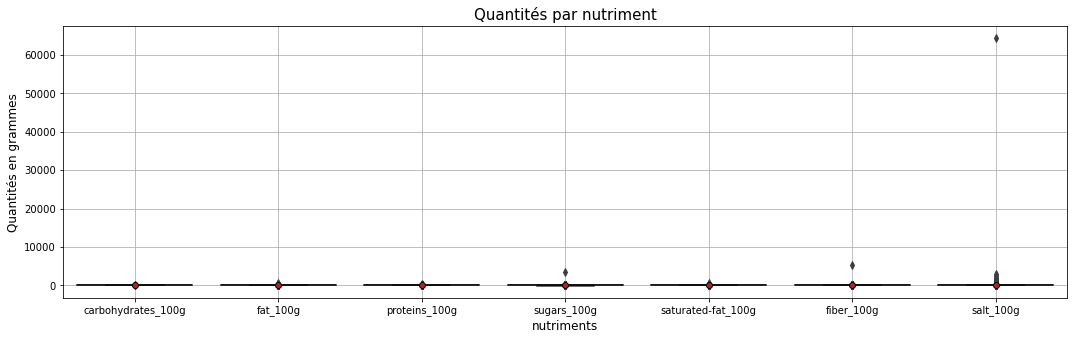

In [33]:
temp = pd.melt(df.select_dtypes(include=['float64']).drop('energy_100g',axis=1)).dropna()
ordre = df.select_dtypes(include=['float64']).drop(['energy_100g','nutrition-score-fr_100g','ingredients_from_palm_oil_n','additives_n'],axis=1).median().sort_values(ascending = False).index
plt.figure(figsize=(18,5))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

sns.boxplot(x="variable", y="value",showfliers=True, medianprops=medianprops, 
             order = ordre, showmeans=True, meanprops=meanprops,data=temp)

plt.title("Quantités par nutriment", fontsize=15)
plt.xlabel("nutriments",color="k",fontsize=12)
plt.ylabel("Quantités en grammes",color="k",fontsize=12)
#plt.gca().yaxis.set_ticks(range(0, 100,5), minor = True)
plt.grid(True)
plt.draw()
#plt.savefig("1.jpg")

In [34]:
#Nous allons maintenant nous débarrasser des duplicatas en supprimant la version la moins bien renseignée
#car code est une valeur unique representant le code barre du produit
df.duplicated('code').sum()

95

In [35]:
# on compte le nombre de valeurs manquantes pour la ligne et on stocke dans une nouvelle colonne
df['NB_NAN'] = df.isna().sum(axis=1)

In [36]:
# trie des lignes en fonction du nombre de valeurs manquantes
df = df.sort_values('NB_NAN')
# suppression des duplicatas en gardant les versions les mieux remplies
df = df.drop_duplicates('code', keep='first')

In [37]:
df = df.drop('NB_NAN', axis=1)

In [38]:
#ne conserver le produit que lorqu'il est referencé comme vendu en france
df = df[df["countries_fr"].str.contains('Fra')]

In [39]:
df = df.drop('countries_fr', axis=1)

In [40]:
qualit(df)

nb de lignes x nb de colonnes :  (60799, 16) .

% de données manquantes :
 labels_fr                      54.982812
ingredients_from_palm_oil_n    32.824553
additives_n                    32.824553
carbohydrates_100g             28.194543
fat_100g                       28.110660
fiber_100g                     26.886955
code                            0.000000
product_name                    0.000000
brands                          0.000000
nutrition_grade_fr              0.000000
energy_100g                     0.000000
saturated-fat_100g              0.000000
sugars_100g                     0.000000
proteins_100g                   0.000000
salt_100g                       0.000000
nutrition-score-fr_100g         0.000000
dtype: float64 

nb de lignes dupliquées : 0 .



In [41]:
df.head(5)

,code,product_name,brands,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,labels_fr,ingredients_from_palm_oil_n,additives_n
228574,3366321050849,"St Hubert Oméga 3 (Sel de Mer, Tartine et Cuis...","St Hubert,St Hubert Oméga 3",d,2004.0,54.00,15.40,0.1,0.10,0.00,0.10,1.2700,14.0,"Sans conservateurs,Sans matière grasse hydrogé...",0.0,3.0
245361,3596710303953,Assortiment de bouchées vapeur,"Auchan,L'oiseau,Auchan Production,Groupe Auchan",c,740.0,6.50,1.70,22.7,5.50,1.60,5.90,1.3500,4.0,Fabriqué en France,0.0,5.0
245362,3596710304363,Terrine de canard au poivre vert,Auchan,e,975.0,18.60,7.40,2.0,2.00,0.00,14.30,10.8600,19.0,"Sans colorants,Sans conservateurs,Point Vert",0.0,1.0
245363,3596710304387,Tagliatelles Saumon,"L'oiseau,Auchan,Auchan Production,Groupe Auchan",c,902.0,14.20,8.00,13.6,2.00,0.80,8.20,0.5588,10.0,"Point Vert,Produit en braille,Eco-emballages",0.0,4.0
245364,3596710304448,Lasagne Bolognaise,Auchan,b,489.0,3.59,2.03,13.6,1.09,1.59,6.59,1.1100,1.0,Point Vert,0.0,4.0


In [42]:
df = df[df['code'].str.contains(r'\d+')]

In [43]:
df = df[df['code'].str.isdigit()]

In [44]:
df['code'].str.len().value_counts()

13    56465
8      3323
11      414
6       236
12      232
5        38
7        32
14       26
10       12
15       10
2         5
4         3
3         2
9         1
Name: code, dtype: Int64

In [45]:
df = df[(df.code.str.len() == 13) | (df.code.str.len() == 8)]

In [46]:
df['code'].str.len().value_counts()

13    56465
8      3323
Name: code, dtype: Int64

In [47]:
df.sort_values(by = ["code"], ascending=False).tail(50)

,code,product_name,brands,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,labels_fr,ingredients_from_palm_oil_n,additives_n
113045,0207709021583,RocheBaron,Rochebaron,e,1431.0,NaN,21.00,NaN,0.000,0.00,18.00,1.900000,22.0,<NA>,NaN,NaN
113024,0207201025522,Escalope De Veau,Carrefour,a,632.0,NaN,1.10,NaN,0.001,0.00,31.00,0.200000,-3.0,<NA>,NaN,NaN
112939,0206243019353,Saumon Fume,Petit Navire,d,858.0,NaN,1.90,NaN,0.500,0.00,22.00,3.000000,13.0,<NA>,NaN,NaN
112916,0205547024605,Emmental français,Casino,d,1495.0,28.00,20.00,0.10,0.100,0.00,27.00,0.700000,12.0,<NA>,0.0,0.0
112879,0205224021194,Buche De Brebis,Aveyron,e,1766.0,NaN,25.50,NaN,0.000,0.00,23.00,1.400000,21.0,<NA>,NaN,NaN
112873,0205140013129,Beignets parfum chocolat noisette - Leclerc At...,Leclerc,d,1611.0,NaN,2.00,NaN,19.000,0.00,6.50,0.710000,12.0,<NA>,NaN,NaN
112872,0205123014433,Triangles Amandes,E. Leclerc,e,1029.0,NaN,14.00,NaN,20.000,0.00,8.50,1.000000,21.0,<NA>,NaN,NaN
112869,0205113039958,Casino filet de merlan pané,Casino,a,897.0,8.80,1.84,20.00,0.880,1.12,13.60,0.345000,-2.0,Sans huile de palme,0.0,0.0
112868,0205093010824,Chouquette X15,E Leclerc,d,1264.0,NaN,9.50,NaN,17.000,0.00,6.80,0.700000,18.0,<NA>,NaN,NaN
112865,0205044006562,Pain Chocolat,Eleclerc,e,1782.0,NaN,15.00,NaN,15.000,0.00,8.50,0.980000,22.0,<NA>,NaN,NaN


In [48]:
df['labels_fr'].value_counts()

Bio,Bio européen,AB Agriculture Biologique           4634
Point Vert                                           1683
Bio,Bio européen,FR-BIO-01,AB Agriculture Biol...     668
Point Vert,Eco-emballages                             609
Labels de distributeurs,Sélection Intermarché         351
                                                     ... 
Sans gluten,Sans OGM,Sans-porc                          1
Peu ou pas de sel,Peu de sel,Allégé en sel,Moi...       1
Bio,Bio européen,FR-BIO-01,Point Vert,Lait Fra...       1
Exclusive-to-travellers                                 1
Peu ou pas de sucre,Sans sucre,Pur beurre,Au s...       1
Name: labels_fr, Length: 7744, dtype: Int64

In [49]:
#df = df.drop('labels_fr', axis=1)
# garder car influence positive

In [50]:
df['ingredients_from_palm_oil_n'].unique()

array([ 0.,  1.,  2., nan])

In [51]:
df['ingredients_from_palm_oil_n'].value_counts()

0.0    37223
1.0     3094
2.0       43
Name: ingredients_from_palm_oil_n, dtype: int64

In [52]:
df['additives_n'].unique()

array([ 3.,  5.,  1.,  4.,  0.,  2.,  8.,  6., 10., 12.,  9.,  7., 13.,
       11., 15., 14., 18., 16., 17., 21., 20., 19., nan, 31.])

In [53]:
df['additives_n'].value_counts()

0.0     15185
1.0      7411
2.0      5183
3.0      3896
4.0      2641
5.0      1969
6.0      1300
7.0       898
8.0       623
9.0       406
10.0      255
11.0      182
12.0      135
13.0       85
14.0       80
15.0       55
16.0       26
18.0        9
17.0        9
21.0        3
20.0        3
19.0        3
31.0        3
Name: additives_n, dtype: int64

In [54]:
#df = df.drop('ingredients_from_palm_oil_n', axis=1)
#a garder car influence negative

In [55]:
qualit(df)

nb de lignes x nb de colonnes :  (59788, 16) .

% de données manquantes :
 labels_fr                      54.659798
ingredients_from_palm_oil_n    32.494815
additives_n                    32.494815
carbohydrates_100g             27.923664
fat_100g                       27.838362
fiber_100g                     27.189403
code                            0.000000
product_name                    0.000000
brands                          0.000000
nutrition_grade_fr              0.000000
energy_100g                     0.000000
saturated-fat_100g              0.000000
sugars_100g                     0.000000
proteins_100g                   0.000000
salt_100g                       0.000000
nutrition-score-fr_100g         0.000000
dtype: float64 

nb de lignes dupliquées : 0 .



In [56]:
#verification de la cherance des données (presence d'outliers)
df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,ingredients_from_palm_oil_n,additives_n
count,5.978800e+04,43144.000000,59788.000000,43093.000000,59788.000000,43532.000000,59788.000000,59788.000000,59788.000000,40360.000000,40360.000000
mean,1.180748e+03,13.339136,5.447547,27.666490,13.324111,2.523057,7.767034,1.081057,8.680504,0.078791,2.052131
std,1.333686e+04,16.771379,8.555680,27.244518,19.013593,4.544715,7.834633,3.816733,9.047314,0.273341,2.616622
min,0.000000e+00,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000
25%,4.350000e+02,1.400000,0.300000,4.100000,1.000000,0.000000,1.900000,0.080000,1.000000,0.000000,0.000000
50%,1.040000e+03,7.000000,2.000000,14.500000,4.000000,1.300000,6.000000,0.558800,9.000000,0.000000,1.000000
75%,1.657000e+03,21.000000,7.500000,53.000000,17.400000,3.200000,11.000000,1.244600,15.000000,0.000000,3.000000
max,3.251373e+06,380.000000,210.000000,190.000000,104.000000,178.000000,100.000000,211.000000,40.000000,2.000000,31.000000


In [57]:
df.describe(include=['string'])

,code,product_name,brands,nutrition_grade_fr,labels_fr
count,59788,59788,59788,59788,27108
unique,59788,50001,12323,5,7744
top,3366321050849,Mayonnaise,Carrefour,d,"Bio,Bio européen,AB Agriculture Biologique"
freq,1,42,2311,16573,4634


In [58]:
def find_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    coef = IQR*1.5
    lim_inf = Q1 - coef
    lim_sup = Q3 + coef
    out = df[(df < lim_inf) | (df > lim_sup)]
    out = out.dropna(subset=['energy_100g','fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
                           'fiber_100g', 'proteins_100g', 'salt_100g'],how='all')
    return out

In [59]:
outliers = find_outliers_IQR(df[['energy_100g','fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
                                 'fiber_100g', 'proteins_100g', 'salt_100g']])
outliers

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
228574,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN
245362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.86
245386,NaN,NaN,NaN,NaN,NaN,9.7,NaN,NaN
245318,NaN,NaN,23.0,NaN,NaN,NaN,25.0,NaN
245398,NaN,NaN,NaN,NaN,NaN,26.4,NaN,NaN
...,...,...,...,...,...,...,...,...
234999,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN
234998,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN
234886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.60
234866,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN


In [60]:
outliers.count()

energy_100g            428
fat_100g              1516
saturated-fat_100g    4309
carbohydrates_100g       2
sugars_100g           6152
fiber_100g            2717
proteins_100g         2385
salt_100g             3094
dtype: int64

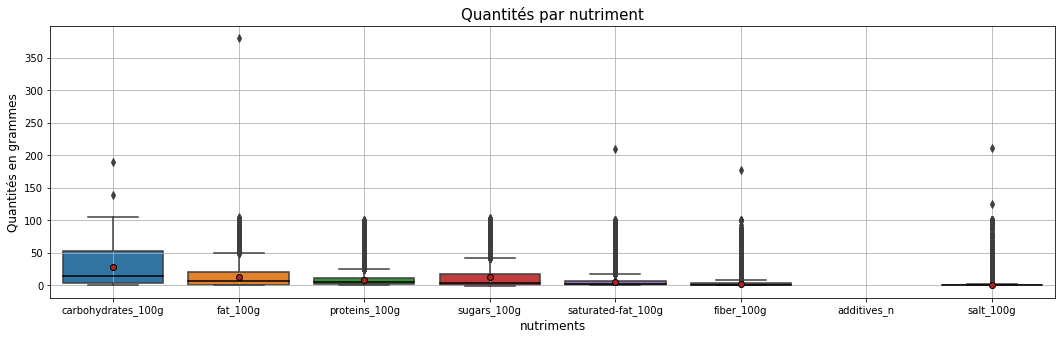

In [61]:
temp = pd.melt(df.select_dtypes(include=['float64']).drop(['energy_100g','nutrition-score-fr_100g','ingredients_from_palm_oil_n','additives_n'],axis=1)).dropna()
ordre = df.select_dtypes(include=['float64']).drop(['energy_100g','nutrition-score-fr_100g','ingredients_from_palm_oil_n'],axis=1).median().sort_values(ascending = False).index
plt.figure(figsize=(18,5))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

sns.boxplot(x="variable", y="value",showfliers=True, medianprops=medianprops, 
             order = ordre, showmeans=True, meanprops=meanprops,data=temp)

plt.title("Quantités par nutriment", fontsize=15)
plt.xlabel("nutriments",color="k",fontsize=12)
plt.ylabel("Quantités en grammes",color="k",fontsize=12)
#plt.gca().yaxis.set_ticks(range(0, 100,5), minor = True)
plt.grid(True)
plt.draw()
#plt.savefig("2.jpg")

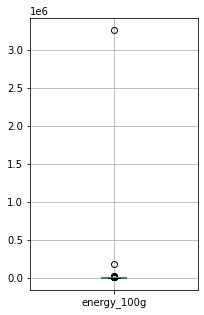

In [62]:
plt.figure(figsize=(3, 5))

df.boxplot('energy_100g');
#plt.savefig("3.jpg")

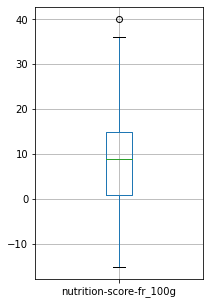

In [63]:
plt.figure(figsize=(3, 5))

df.boxplot('nutrition-score-fr_100g');
#plt.savefig("4.jpg")

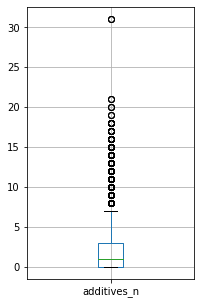

In [64]:
plt.figure(figsize=(3, 5))

df.boxplot('additives_n');
#plt.savefig("5.jpg")

In [65]:
#Les aliments les plus caloriques - Journal des Femmes Santé https://sante.journaldesfemmes.fr › aliments › calories
#Rang	Aliment	Kilocalories
#1	huile d'avocat	900,00 kcal
#2	huile de colza	900,00 kcal
#3	huile de foie de morue	900,00 kcal
#900 kcal = 3765,6 kilojoule
#ici le max le plus plausibles est Oliviers & Co 3768.0 Kj code 	3547130079331

In [66]:
df[df['energy_100g'] > 3766].sort_values(by=['energy_100g']).head(40)

,code,product_name,brands,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,labels_fr,ingredients_from_palm_oil_n,additives_n
237248,3547130079058,Huile d'olive vierge extra Castillo de Canena,Oliviers & Co,d,3768.0,99.7,15.10,0.0,0.0,NaN,0.00,0.00000,11.0,<NA>,NaN,NaN
237242,3547130071496,Spécialité à base d'olive & de basilic,Oliviers & Co,d,3768.0,99.8,15.10,0.0,0.0,NaN,0.00,0.00000,11.0,<NA>,0.0,0.0
250741,3700663000252,Mélange 6 huiles,"Quintesens-bio,Biofuture",c,3768.0,100.0,8.90,0.0,0.0,NaN,0.00,0.00000,10.0,"Bio,Bio européen,FR-BIO-01,AB Agriculture Biol...",0.0,0.0
237244,3547130071601,Spécialité à Base d'Olive et de Basilic,Oliviers & Co.,e,3768.0,99.8,15.10,0.0,0.0,NaN,0.00,0.00000,20.0,"Point Vert,Fabriqué en Italie",0.0,0.0
237249,3547130079331,Château Virant Famille Cheylan Aix-en-Provence...,Oliviers & Co,d,3768.0,99.8,15.10,0.0,0.0,NaN,0.00,0.00000,11.0,AOP,0.0,0.0
203900,3245412459139,Raviolini au Jambon et Aux Œufs Frais,Carrefour,d,3770.0,3.9,2.00,32.0,1.8,1.9,12.00,0.84000,12.0,Point Vert,0.0,5.0
245178,3596710219575,Huile de noix,Auchan,d,3772.0,100.0,11.00,0.0,0.0,0.0,0.00,0.00000,11.0,<NA>,0.0,0.0
247676,3599741003397,6 Fish & Crock De Colin D'alaska,Findus,d,3774.0,NaN,0.70,NaN,0.8,1.3,11.00,1.30000,14.0,<NA>,NaN,NaN
251321,3760020065102,Sardines à l'huile d'olive,La compagnie bretonne du poisson,d,3833.0,NaN,3.60,NaN,0.0,0.0,21.10,0.90000,16.0,<NA>,NaN,NaN
243925,3571375922206,Gateau Amandes Et Chocolat,Biscuiterie de provence,e,3849.0,NaN,16.50,NaN,44.0,14.5,25.00,0.25000,25.0,"Bio,Bio européen,AB Agriculture Biologique",NaN,NaN


In [67]:
df[df['energy_100g'] > 3768].sort_values(by=['energy_100g'])
#aliments a effacer

,code,product_name,brands,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,labels_fr,ingredients_from_palm_oil_n,additives_n
203900,3245412459139,Raviolini au Jambon et Aux Œufs Frais,Carrefour,d,3770.0,3.9,2.0,32.0,1.8,1.9,12.0,0.84,12.0,Point Vert,0.0,5.0
245178,3596710219575,Huile de noix,Auchan,d,3772.0,100.0,11.0,0.0,0.0,0.0,0.0,0.00,11.0,<NA>,0.0,0.0
247676,3599741003397,6 Fish & Crock De Colin D'alaska,Findus,d,3774.0,NaN,0.7,NaN,0.8,1.3,11.0,1.30,14.0,<NA>,NaN,NaN
251321,3760020065102,Sardines à l'huile d'olive,La compagnie bretonne du poisson,d,3833.0,NaN,3.6,NaN,0.0,0.0,21.1,0.90,16.0,<NA>,NaN,NaN
243925,3571375922206,Gateau Amandes Et Chocolat,Biscuiterie de provence,e,3849.0,NaN,16.5,NaN,44.0,14.5,25.0,0.25,25.0,"Bio,Bio européen,AB Agriculture Biologique",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178787,20233679,Halva with Almonds,"Eridanous,Lidl",e,9983.0,36.8,7.8,44.2,32.0,NaN,12.9,0.00,24.0,Point Vert,1.0,0.0
223318,3291960006127,Huiles vierge biologique de Colza - première p...,Emile noel,c,15481.0,100.0,8.0,0.0,0.0,0.0,0.0,0.00,10.0,"Bio,Bio européen,AB Agriculture Biologique",0.0,0.0
245311,3596710288755,mini choux goût fromage de chèvre - poivre,Auchan,e,18700.0,380.0,210.0,190.0,22.7,0.0,0.0,9.33,35.0,<NA>,1.0,7.0
249101,3661405001053,"Légume Noisettes Carottes, 500 Grammes, Marque...",Iglo,d,182764.0,9.0,2.0,21.0,4.5,3.5,4.0,1.19,12.0,<NA>,NaN,NaN


In [68]:
df = df[df['energy_100g'] <= 3768]

In [69]:
qualit(df)

nb de lignes x nb de colonnes :  (59698, 16) .

% de données manquantes :
 labels_fr                      54.628296
ingredients_from_palm_oil_n    32.421522
additives_n                    32.421522
carbohydrates_100g             27.845154
fat_100g                       27.759724
fiber_100g                     27.223693
code                            0.000000
product_name                    0.000000
brands                          0.000000
nutrition_grade_fr              0.000000
energy_100g                     0.000000
saturated-fat_100g              0.000000
sugars_100g                     0.000000
proteins_100g                   0.000000
salt_100g                       0.000000
nutrition-score-fr_100g         0.000000
dtype: float64 

nb de lignes dupliquées : 0 .



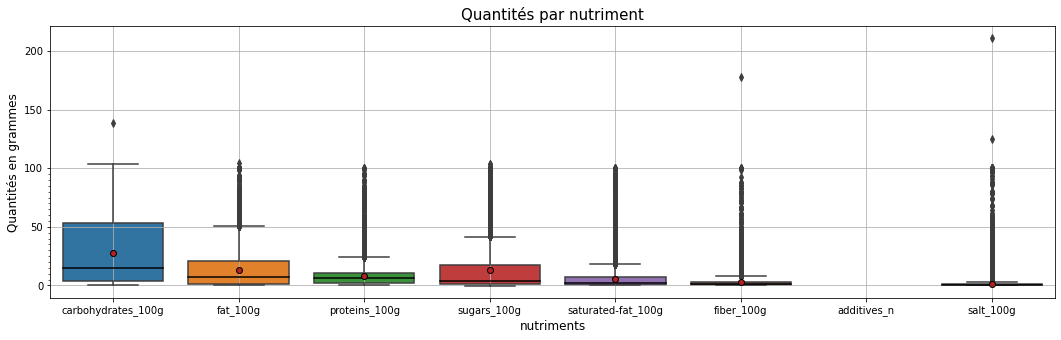

In [70]:
temp = pd.melt(df.select_dtypes(include=['float64']).drop(['energy_100g','nutrition-score-fr_100g','ingredients_from_palm_oil_n','additives_n'],axis=1)).dropna()
ordre = df.select_dtypes(include=['float64']).drop(['energy_100g','nutrition-score-fr_100g','ingredients_from_palm_oil_n'],axis=1).median().sort_values(ascending = False).index
plt.figure(figsize=(18,5))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

sns.boxplot(x="variable", y="value",showfliers=True, medianprops=medianprops, 
             order = ordre, showmeans=True, meanprops=meanprops,data=temp)

plt.title("Quantités par nutriment", fontsize=15)
plt.xlabel("nutriments",color="k",fontsize=12)
plt.ylabel("Quantités en grammes",color="k",fontsize=12)
plt.gca().yaxis.set_ticks(range(0, 100,5), minor = True)
plt.grid(True)
plt.draw()
#plt.savefig("6.jpg")

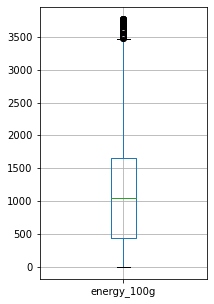

In [71]:
plt.figure(figsize=(3, 5))

df.boxplot('energy_100g');
#plt.savefig("7.jpg")

In [72]:
#considerant que quelque soit le nutrigrade les chances qu'il y ait 0 huile de palme varient de 80 a 99%
#nous remplacerons les valeurs manquantes par 0.0
temp = df.dropna(subset=['nutrition_grade_fr','ingredients_from_palm_oil_n'],how='any')
temp.groupby('nutrition_grade_fr')['ingredients_from_palm_oil_n'].value_counts(normalize=True)

nutrition_grade_fr  ingredients_from_palm_oil_n
a                   0.0                            0.994974
                    1.0                            0.004886
                    2.0                            0.000140
b                   0.0                            0.982177
                    1.0                            0.017823
c                   0.0                            0.947447
                    1.0                            0.051982
                    2.0                            0.000571
d                   0.0                            0.901763
                    1.0                            0.096258
                    2.0                            0.001979
e                   0.0                            0.809568
                    1.0                            0.188455
                    2.0                            0.001977
Name: ingredients_from_palm_oil_n, dtype: float64

In [73]:
#mis a part en nutrition grade 'e' ou l'ajout d'un additif est le plus inmportant, pour les autres grades 0.0 est
#le chiffre le plus reccurent
temp = df.dropna(subset=['nutrition_grade_fr','additives_n'],how='any')
temp.groupby('nutrition_grade_fr')['additives_n'].value_counts(normalize=True).head(50)

nutrition_grade_fr  additives_n
a                   0.0            0.628089
                    1.0            0.185397
                    2.0            0.082228
                    3.0            0.037694
                    4.0            0.022337
                    5.0            0.015217
                    6.0            0.011587
                    7.0            0.005584
                    8.0            0.003769
                    10.0           0.002373
                    9.0            0.002094
                    11.0           0.001536
                    12.0           0.000977
                    15.0           0.000698
                    13.0           0.000279
                    14.0           0.000140
b                   0.0            0.430194
                    1.0            0.158483
                    2.0            0.119168
                    3.0            0.083348
                    4.0            0.062030
                    5.0            0.047003


In [74]:
#mis a part en nutrition grade 'e' ou l'ajout d'un additif est le plus inmportant, pour les autres grades 0.0 est
#le chiffre le plus reccurent
temp = df.dropna(subset=['nutrition_grade_fr','additives_n'],how='any')
temp.groupby('nutrition_grade_fr')['additives_n'].value_counts(normalize=True).tail(50)

nutrition_grade_fr  additives_n
c                   13.0           0.002171
                    14.0           0.001828
                    15.0           0.001485
                    16.0           0.000228
                    17.0           0.000228
                    19.0           0.000114
d                   0.0            0.340050
                    1.0            0.149244
                    2.0            0.126035
                    3.0            0.107233
                    4.0            0.073408
                    5.0            0.059554
                    6.0            0.043541
                    7.0            0.032656
                    8.0            0.022580
                    9.0            0.015203
                    10.0           0.009266
                    11.0           0.006117
                    12.0           0.005128
                    14.0           0.002969
                    13.0           0.002699
                    15.0           0.001799


In [75]:
def outnan(df):
    for column in df:
        if column == 'nutrition-score-fr_100g':
            continue
           
        elif column == 'energy_100g':
            continue
          
        elif column == 'ingredients_from_palm_oil_n':
            df[column] = df[column].fillna('0.0')
            
        elif column == 'labels_fr':
            df.loc[df[column].isna(), column] = 'no_label'
            df.loc[df[column] != 'no_label', column] = 'labeled'
        
        elif column == 'additives_n':
            df[column] = np.where((df['nutrition_grade_fr'] == 'e'), df[column].fillna('1.0'), df[column])
            df[column] = np.where((df['nutrition_grade_fr'] == 'd'), df[column].fillna('0.0'), df[column])
            df[column] = np.where((df['nutrition_grade_fr'] == 'c'), df[column].fillna('0.0'), df[column])
            df[column] = np.where((df['nutrition_grade_fr'] == 'b'), df[column].fillna('0.0'), df[column])
            df[column] = np.where((df['nutrition_grade_fr'] == 'a'), df[column].fillna('0.0'), df[column])
        
        elif df[column].dtypes == np.float64 :
            df[column] = np.where((df[column] > 100), 100, df[column])
        
        else:
            continue

In [76]:
df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,ingredients_from_palm_oil_n,additives_n
count,59698.000000,43126.000000,59698.000000,43075.000000,59698.000000,43446.000000,59698.000000,59698.000000,59698.000000,40343.000000,40343.000000
mean,1117.074747,13.325175,5.442879,27.658362,13.312342,2.520971,7.765165,1.079916,8.665701,0.078775,2.052500
std,771.305599,16.668441,8.510855,27.231073,18.997693,4.525419,7.832324,3.816318,9.042082,0.273318,2.616806
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000
25%,434.000000,1.400000,0.300000,4.100000,1.000000,0.000000,1.900000,0.080000,1.000000,0.000000,0.000000
50%,1038.000000,7.000000,2.000000,14.500000,4.000000,1.300000,6.000000,0.558800,9.000000,0.000000,1.000000
75%,1653.000000,21.000000,7.500000,53.000000,17.300000,3.200000,10.900000,1.244600,15.000000,0.000000,3.000000
max,3768.000000,105.000000,100.000000,139.000000,104.000000,178.000000,100.000000,211.000000,40.000000,2.000000,31.000000


In [77]:
outnan(df)

In [78]:
df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,59698.000000,43126.000000,59698.000000,43075.000000,59698.000000,43446.000000,59698.000000,59698.000000,59698.000000
mean,1117.074747,13.325059,5.442879,27.657283,13.312217,2.519176,7.765165,1.077638,8.665701
std,771.305599,16.667821,8.510855,27.227545,18.997108,4.470946,7.832324,3.727829,9.042082
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,-15.000000
25%,434.000000,1.400000,0.300000,4.100000,1.000000,0.000000,1.900000,0.080000,1.000000
50%,1038.000000,7.000000,2.000000,14.500000,4.000000,1.300000,6.000000,0.558800,9.000000
75%,1653.000000,21.000000,7.500000,53.000000,17.300000,3.200000,10.900000,1.244600,15.000000
max,3768.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,40.000000


In [85]:
df.describe(include=['string'])

,code,product_name,brands,nutrition_grade_fr,labels_fr
count,59698,59698,59698,59698,59698
unique,59698,49926,12313,5,2
top,3366321050849,Mayonnaise,Carrefour,d,no_label
freq,1,41,2307,16541,32612


In [79]:
df[['nutrition-score-fr_100g','ingredients_from_palm_oil_n','additives_n']] = df[['nutrition-score-fr_100g','ingredients_from_palm_oil_n','additives_n']].astype('float')
df[['nutrition-score-fr_100g','ingredients_from_palm_oil_n','additives_n']] = df[['nutrition-score-fr_100g','ingredients_from_palm_oil_n','additives_n']].astype('int')

In [80]:
df.dtypes

code                            string
product_name                    string
brands                          string
nutrition_grade_fr              string
energy_100g                    float64
fat_100g                       float64
saturated-fat_100g             float64
carbohydrates_100g             float64
sugars_100g                    float64
fiber_100g                     float64
proteins_100g                  float64
salt_100g                      float64
nutrition-score-fr_100g          int32
labels_fr                       string
ingredients_from_palm_oil_n      int32
additives_n                      int32
dtype: object

In [81]:
qualit(df)

nb de lignes x nb de colonnes :  (59698, 16) .

% de données manquantes :
 carbohydrates_100g             27.845154
fat_100g                       27.759724
fiber_100g                     27.223693
code                            0.000000
product_name                    0.000000
brands                          0.000000
nutrition_grade_fr              0.000000
energy_100g                     0.000000
saturated-fat_100g              0.000000
sugars_100g                     0.000000
proteins_100g                   0.000000
salt_100g                       0.000000
nutrition-score-fr_100g         0.000000
labels_fr                       0.000000
ingredients_from_palm_oil_n     0.000000
additives_n                     0.000000
dtype: float64 

nb de lignes dupliquées : 0 .



In [82]:
#carbohydrates_100g            
#fat_100g                       
#fiber_100g                    
#choix de laisser les NaN car peuvent etre valeur nulles ou manquante de maniere a ne pas biaiser notre analyse

In [83]:
df.head(5)

,code,product_name,brands,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,labels_fr,ingredients_from_palm_oil_n,additives_n
228574,3366321050849,"St Hubert Oméga 3 (Sel de Mer, Tartine et Cuis...","St Hubert,St Hubert Oméga 3",d,2004.0,54.00,15.40,0.1,0.10,0.00,0.10,1.2700,14,labeled,0,3
245361,3596710303953,Assortiment de bouchées vapeur,"Auchan,L'oiseau,Auchan Production,Groupe Auchan",c,740.0,6.50,1.70,22.7,5.50,1.60,5.90,1.3500,4,labeled,0,5
245362,3596710304363,Terrine de canard au poivre vert,Auchan,e,975.0,18.60,7.40,2.0,2.00,0.00,14.30,10.8600,19,labeled,0,1
245363,3596710304387,Tagliatelles Saumon,"L'oiseau,Auchan,Auchan Production,Groupe Auchan",c,902.0,14.20,8.00,13.6,2.00,0.80,8.20,0.5588,10,labeled,0,4
245364,3596710304448,Lasagne Bolognaise,Auchan,b,489.0,3.59,2.03,13.6,1.09,1.59,6.59,1.1100,1,labeled,0,4


In [84]:
df.to_csv('df.csv', sep=',', encoding='utf-8', index=True)